 # Gold Surface Plasmon Resonance (SPR) Example
 The notebook is structured as follows:
 -  Setup of useful settings and import of necessary libraries
 -  Inputs for the simulation
 -  Computation
 - Plot


## Settings and libraries

In [1]:
# libraries
import numpy as np # numpy
import sys                  # sys to add py_matrix to the path

# matplotlib inline plots
import matplotlib.pylab as plt
%matplotlib inline

# adding py_matrix parent folder to python path
sys.path.append('../../')
import py_matrix as pm # importing py_matrix

# useful parameters
f_size=20;

## Inputs
- Loading optical constants and building the optical constant database
- Setting the inputs such as layer compositionm thickness, incident angles, etc...

In [2]:
# building the optical constant database, point the folder below to the "materials" py_matrix folder
eps_db_out=pm.mat.generate_eps_db('../materials/',ext='*.edb')
eps_files,eps_names,eps_db=eps_db_out['eps_files'],eps_db_out['eps_names'],eps_db_out['eps_db']

In [3]:
# multilayer and computation inputs
stack=['e_bk7','e_au','e_vacuum']; # materials composing the stack, as taken from eps_db
d_list=[0.0,55.0,0.0]; # multilayer thicknesses: incident medium and substrate have zero thickness
wl_0=633; # incident wavelenght in nm
# polar angle in radians
theta_min=40*np.pi/1.8e2;
theta_max=50*np.pi/1.8e2;
theta_step=500;
v_theta=np.linspace(theta_min,theta_max,theta_step)
# azimuthal angle radians
phi_0=0.0

## Computation
- Retrieval of optical constants at $\lambda$=633 nm from the optical constant database
- Filling of the dielectric tensor at $\lambda$=633 nm
- Initialization of the reflectance output vector
- Polar angle loop

In [4]:
# optical constant tensor
m_eps=np.zeros((len(stack),3,3),dtype=np.complex128);
e_list=pm.mat.db_to_eps(wl_0,eps_db,stack) # retrieving optical constants at wl_0 from the database
m_eps[:,0,0]=e_list # filling dielectric tensor diagonal
m_eps[:,1,1]=e_list
m_eps[:,2,2]=e_list

# initializing reflectance output vector
v_r_p=np.zeros_like(v_theta)

# angle loop
for i_t,t in enumerate(v_theta):
        
    #------Computing------
    m_r_ps=pm.core.rt(wl_0,t,phi_0,m_eps,d_list)['m_r_ps'] # reflection matrix
    v_r_p[i_t]=pm.utils.R_ps_rl(m_r_ps)['R_p'] # getting p-polarized reflectance

## Plot of the reflectance spectrum at $\lambda$ = 633 nm

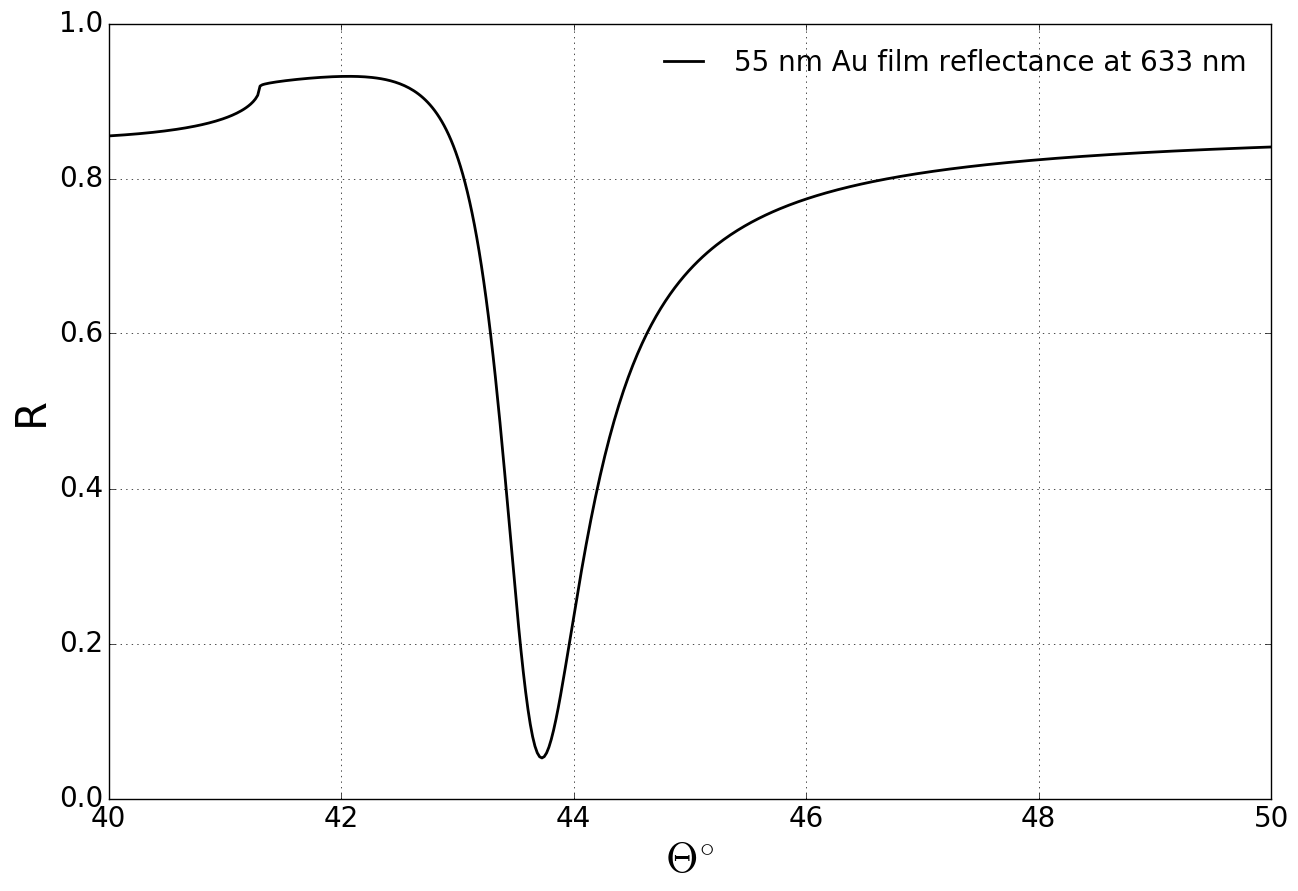

In [5]:
# reflectivity plots
plt.figure(1,figsize=(15,10))
plt.plot(v_theta*1.8e2/np.pi,v_r_p,'k',linewidth=2.0)

# labels
plt.xlabel(r'$\Theta^{\circ}$',fontsize=f_size+10)
plt.ylabel('R',fontsize=f_size+10)

# ticks
plt.xticks(fontsize=f_size)
plt.yticks(fontsize=f_size)

# grids
plt.grid()

#legends
plt.legend(['55 nm Au film reflectance at 633 nm'],loc='upper right',fontsize=f_size,frameon=False);

## Plot of the local fields at $\lambda=633$ nm at the SPP coupling angle

In [7]:
# fields components and wavevectors
theta_0 = v_theta[v_r_p.argmin()]  # getting the plasmon coupling angle
out = pm.core.rt(wl_0,theta_0,phi_0,m_eps,d_list) # reflection matrix
m_Kn = out['m_Kn']
m_Hn = out['m_Hn']
m_En = out['m_En']

# computing the field, absorbed power and Poynting vector
v_z = np.linspace(-100,500,1000)  # z probing
v_field = np.array([np.abs(pm.utils.field(m_Kn,m_En,m_Hn,e_list,d_list,0.0,0.0,z,'TM')['H'][1]) for z in v_z])
v_abs = np.array([np.abs(pm.utils.field(m_Kn,m_En,m_Hn,e_list,d_list,0.0,0.0,z,'TM')['abs']) for z in v_z])
v_S = np.array([np.abs(pm.utils.field(m_Kn,m_En,m_Hn,e_list,d_list,0.0,0.0,z,'TM')['S']) for z in v_z])

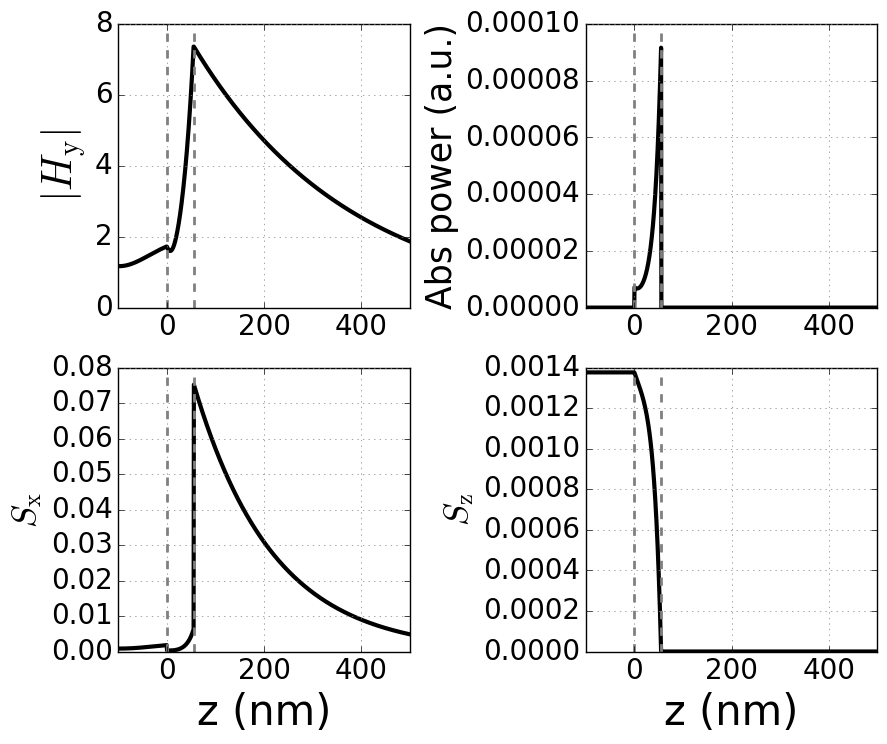

In [8]:
# field plots
plt.figure(figsize=(9,7.5))

# transverse magnetic field modulues
plt.subplot(2,2,1)

# plot
plt.plot(v_z,v_field,'k',linewidth=3.0)
plt.axvline(d_list[0],color='gray',linestyle='dashed',linewidth=2.0)
plt.axvline(d_list[1],color='gray',linestyle='dashed',linewidth=2.0)

# labels
plt.ylabel(r'$|H_{\mathrm{y}}|$',fontsize=f_size+10)

# ticks
plt.xticks([0,200,400],fontsize=f_size)
plt.yticks([0,2,4,6,8],fontsize=f_size)

# grids
plt.grid(color='gray')


# local absorbed power
plt.subplot(2,2,2)

# plot
plt.plot(v_z,v_abs,'k',linewidth=3.0)
plt.axvline(d_list[0],color='gray',linestyle='dashed',linewidth=2.0)
plt.axvline(d_list[1],color='gray',linestyle='dashed',linewidth=2.0)

# labels
plt.ylabel(r'Abs power (a.u.)',fontsize=f_size+5)

# ticks
plt.xticks([0,200,400],fontsize=f_size)
plt.yticks(fontsize=f_size)

# grids
plt.grid(color='gray')


# Sx component of the Poynting vector
plt.subplot(2,2,3)

# plot
plt.plot(v_z,v_S[:,0],'k',linewidth=3.0)
plt.axvline(d_list[0],color='gray',linestyle='dashed',linewidth=2.0)
plt.axvline(d_list[1],color='gray',linestyle='dashed',linewidth=2.0)

# labels
plt.xlabel(r'z (nm)',fontsize=f_size+10)
plt.ylabel(r'$S_{\mathrm{x}}$',fontsize=f_size+5)

# ticks
plt.xticks([0,200,400],fontsize=f_size)
plt.yticks(fontsize=f_size)

# grids
plt.grid(color='gray')


# Sz component of the Poynting vector
plt.subplot(2,2,4)

# plot
plt.plot(v_z,v_S[:,2],'k',linewidth=3.0)
plt.axvline(d_list[0],color='gray',linestyle='dashed',linewidth=2.0)
plt.axvline(d_list[1],color='gray',linestyle='dashed',linewidth=2.0)

# labels
plt.xlabel(r'z (nm)',fontsize=f_size+10)
plt.ylabel(r'$S_{\mathrm{z}}$',fontsize=f_size+5)

# ticks
plt.xticks([0,200,400],fontsize=f_size)
plt.yticks(fontsize=f_size)

# grids
plt.grid(color='gray')


plt.tight_layout()